<a href="https://colab.research.google.com/github/ChDamodhar/Retail-Inventory-Order-Management-System-Core-Python/blob/main/preprocessedData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Original Series
s = pd.Series([
    "junior", "senior", "manager", "junior", "senior",
    "manager", "junior", "senior", "manager", "junior",
    "senior", "manager", "junior", "senior", "manager",
    "junior", "senior", "manager", "junior", "senior"
])

# One Hot Encoding
one_hot = pd.get_dummies(s)
print("One Hot Encoded DataFrame:")
print(one_hot)

# Label Encoding using factorize()
labels, categories = pd.factorize(s)

print("\nLabel Encoded Values:")
print(labels)

print("\nCategory Mapping (order of appearance):")
print(categories)


One Hot Encoded DataFrame:
    junior  manager  senior
0     True    False   False
1    False    False    True
2    False     True   False
3     True    False   False
4    False    False    True
5    False     True   False
6     True    False   False
7    False    False    True
8    False     True   False
9     True    False   False
10   False    False    True
11   False     True   False
12    True    False   False
13   False    False    True
14   False     True   False
15    True    False   False
16   False    False    True
17   False     True   False
18    True    False   False
19   False    False    True

Label Encoded Values:
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1]

Category Mapping (order of appearance):
Index(['junior', 'senior', 'manager'], dtype='object')


In [5]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/loan_approved.csv')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [12]:
print(df.isnull().sum())

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    print(df[col].mode()[0])

num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64
LP001002
Male
Yes
0
Graduate
No
Semiurban
Y


In [18]:
df.duplicated().sum()
df[df.duplicated()]
df.drop_duplicates(inplace=True)



In [19]:
import pandas as pd

# ---------- LABEL ENCODING ----------
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col], uniques = pd.factorize(df[col])
    print(f"{col} mapping:", dict(enumerate(uniques)))
    print()

# ---------- ONE HOT ENCODING ----------
one_hot_cols = ['Gender', 'Married', 'Education', 'Property_Area']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

print("\nFinal DataFrame after encoding:")
print(df.head())


Loan_ID mapping: {0: 'LP001002', 1: 'LP001003', 2: 'LP001005', 3: 'LP001006', 4: 'LP001008', 5: 'LP001011', 6: 'LP001013', 7: 'LP001014', 8: 'LP001018', 9: 'LP001020', 10: 'LP001024', 11: 'LP001027', 12: 'LP001028', 13: 'LP001029', 14: 'LP001030', 15: 'LP001032', 16: 'LP001034', 17: 'LP001036', 18: 'LP001038', 19: 'LP001041', 20: 'LP001043', 21: 'LP001046', 22: 'LP001047', 23: 'LP001050', 24: 'LP001052', 25: 'LP001066', 26: 'LP001068', 27: 'LP001073', 28: 'LP001086', 29: 'LP001087', 30: 'LP001091', 31: 'LP001095', 32: 'LP001097', 33: 'LP001098', 34: 'LP001100', 35: 'LP001106', 36: 'LP001109', 37: 'LP001112', 38: 'LP001114', 39: 'LP001116', 40: 'LP001119', 41: 'LP001120', 42: 'LP001123', 43: 'LP001131', 44: 'LP001136', 45: 'LP001137', 46: 'LP001138', 47: 'LP001144', 48: 'LP001146', 49: 'LP001151', 50: 'LP001155', 51: 'LP001157', 52: 'LP001164', 53: 'LP001179', 54: 'LP001186', 55: 'LP001194', 56: 'LP001195', 57: 'LP001197', 58: 'LP001198', 59: 'LP001199', 60: 'LP001205', 61: 'LP001206', 

In [22]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [23]:
df["LoanAmount"].unique()

array([128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70., 109.,
       200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315., 116.,
       112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320., 144.,
       184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97., 135.,
       180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187., 113.,
       176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,  25.,
       137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,  85.,
       259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242., 129.,
        30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87., 101.,
       495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,  90.,
       166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,  42.,
       280., 140., 155., 123., 279., 192., 304., 330., 150., 207., 436.,
        78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300., 376.,
       117.,  71., 490., 173.,  46., 228., 308., 23

In [24]:
df['Credit_History'].unique()

array([1., 0.])

In [25]:
df.to_csv('/content/drive/My Drive/preprocessedLoanData.csv', index=False)
print("File saved successfully!")

File saved successfully!


In [26]:
df.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_1,Married_1,Education_1,Property_Area_1,Property_Area_2
0,0,0,0,5849,0.0,128.0,360.0,1.0,0,False,False,False,False,False
1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,False,True,False,True,False
2,2,0,1,3000,0.0,66.0,360.0,1.0,0,False,True,False,False,False
3,3,0,0,2583,2358.0,120.0,360.0,1.0,0,False,True,True,False,False
4,4,0,0,6000,0.0,141.0,360.0,1.0,0,False,False,False,False,False


In [27]:
df.head(10)

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_1,Married_1,Education_1,Property_Area_1,Property_Area_2
0,0,0,0,5849,0.0,128.0,360.0,1.0,0,False,False,False,False,False
1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,False,True,False,True,False
2,2,0,1,3000,0.0,66.0,360.0,1.0,0,False,True,False,False,False
3,3,0,0,2583,2358.0,120.0,360.0,1.0,0,False,True,True,False,False
4,4,0,0,6000,0.0,141.0,360.0,1.0,0,False,False,False,False,False
5,5,2,1,5417,4196.0,267.0,360.0,1.0,0,False,True,False,False,False
6,6,0,0,2333,1516.0,95.0,360.0,1.0,0,False,True,True,False,False
7,7,3,0,3036,2504.0,158.0,360.0,0.0,1,False,True,False,False,True
8,8,2,0,4006,1526.0,168.0,360.0,1.0,0,False,True,False,False,False
9,9,1,0,12841,10968.0,349.0,360.0,1.0,1,False,True,False,False,True


In [28]:
df.shape

(614, 14)

In [33]:
mean=df['ApplicantIncome'].mean()
sd=df['ApplicantIncome'].std()

df['zscore']=(df['ApplicantIncome']-mean)/sd
df['outlier'] = df['zscore'].abs() > 3



In [34]:
df.head(10)

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_1,Married_1,Education_1,Property_Area_1,Property_Area_2,zscore,outlier
0,0,0,0,5849,0.0,128.0,360.0,1.0,0,False,False,False,False,False,0.072931,False
1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,False,True,False,True,False,-0.134302,False
2,2,0,1,3000,0.0,66.0,360.0,1.0,0,False,True,False,False,False,-0.393427,False
3,3,0,0,2583,2358.0,120.0,360.0,1.0,0,False,True,True,False,False,-0.461686,False
4,4,0,0,6000,0.0,141.0,360.0,1.0,0,False,False,False,False,False,0.097649,False
5,5,2,1,5417,4196.0,267.0,360.0,1.0,0,False,True,False,False,False,0.002217,False
6,6,0,0,2333,1516.0,95.0,360.0,1.0,0,False,True,True,False,False,-0.502609,False
7,7,3,0,3036,2504.0,158.0,360.0,0.0,1,False,True,False,False,True,-0.387534,False
8,8,2,0,4006,1526.0,168.0,360.0,1.0,0,False,True,False,False,False,-0.228753,False
9,9,1,0,12841,10968.0,349.0,360.0,1.0,1,False,True,False,False,True,1.217464,False


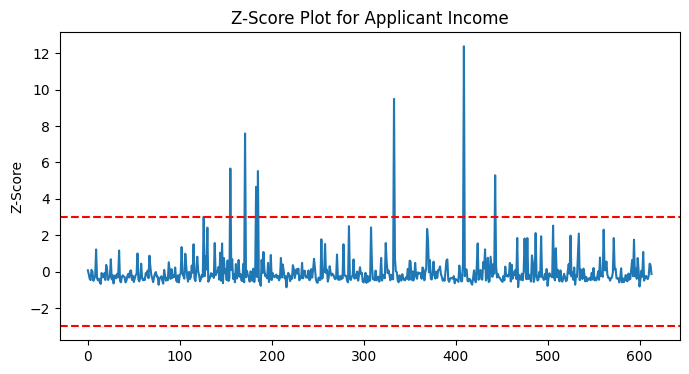

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(df['zscore'])
plt.axhline(3, color='red', linestyle='--')
plt.axhline(-3, color='red', linestyle='--')
plt.title("Z-Score Plot for Applicant Income")
plt.ylabel("Z-Score")
plt.show()


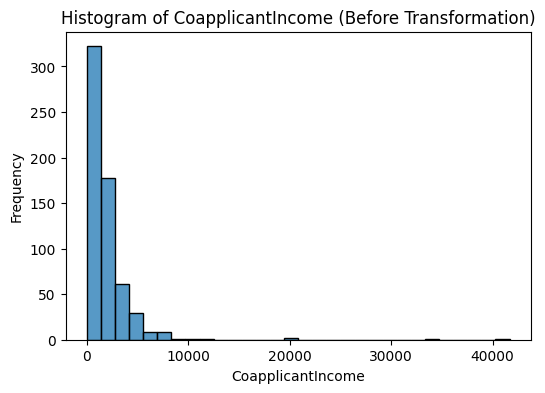

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.histplot(df['CoapplicantIncome'], bins=30)
plt.title("Histogram of CoapplicantIncome (Before Transformation)")
plt.xlabel("CoapplicantIncome")
plt.ylabel("Frequency")
plt.show()


(614, 1)
Skewness : -0.14564645710551902
Kurtosis : -1.8778432766544493


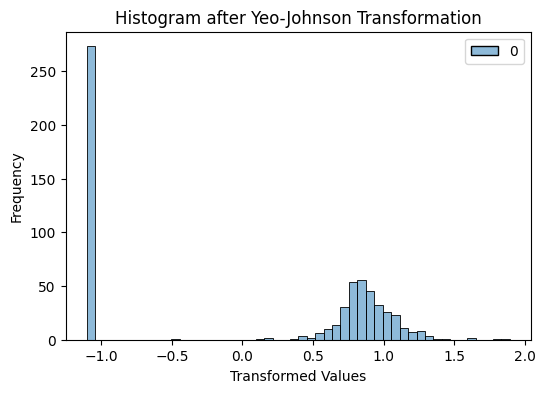

In [44]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# PowerTransformer (Yeo-Johnson works with zero & negative values)
trans = PowerTransformer(method='yeo-johnson')

# Fit & transform
la_trans = trans.fit_transform(df[["CoapplicantIncome"]])

# Check shape
print(la_trans.shape)

# Skewness & Kurtosis after transformation
print("Skewness :", pd.Series(la_trans.reshape(614,)).skew())
print("Kurtosis :", pd.Series(la_trans.reshape(614,)).kurtosis())

# Histogram
plt.figure(figsize=(6,4))
sns.histplot(la_trans, bins=50)   # Increase number of bins
plt.title("Histogram after Yeo-Johnson Transformation")
plt.xlabel("Transformed Values")
plt.ylabel("Frequency")
plt.show()



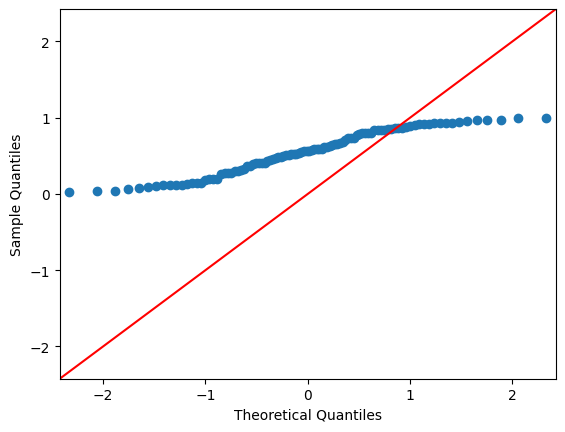

In [45]:
import numpy as np
import statsmodels.api as sm
import pylab as py

# Generate random data (not normally distributed)
data = np.random.rand(100)

# QQ Plot
sm.qqplot(data, line='45')   # 45-degree reference line

py.show()


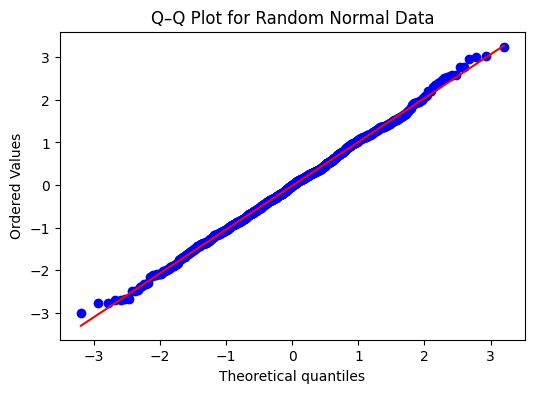

In [47]:
import numpy as np

# Generate 1000 random values from a normal distribution
data = np.random.normal(loc=0, scale=1, size=1000)


import matplotlib.pyplot as plt
from scipy import stats

plt.figure(figsize=(6, 4))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q–Q Plot for Random Normal Data")
plt.show()

